In [93]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
from konlpy.tag import Kkma


In [86]:
train_df = pd.read_csv('../dataset/train/train.csv')
test_df = pd.read_csv('../dataset/test/test_data.csv')

train_df.shape, test_df.shape

((32470, 6), (7765, 6))

In [87]:
train_df

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [88]:
counter = Counter(train_df.label)
print(counter)

Counter({'no_relation': 9534, 'org:top_members/employees': 4284, 'per:employee_of': 3573, 'per:title': 2103, 'org:member_of': 1866, 'org:alternate_names': 1320, 'per:origin': 1234, 'org:place_of_headquarters': 1195, 'per:date_of_birth': 1130, 'per:alternate_names': 1001, 'per:spouse': 795, 'per:colleagues': 534, 'per:parents': 520, 'org:founded': 450, 'org:members': 420, 'per:date_of_death': 418, 'org:product': 380, 'per:children': 304, 'per:place_of_residence': 193, 'per:other_family': 190, 'per:place_of_birth': 166, 'org:founded_by': 155, 'per:product': 139, 'per:siblings': 136, 'org:political/religious_affiliation': 98, 'per:religion': 96, 'per:schools_attended': 82, 'org:dissolved': 66, 'org:number_of_employees/members': 48, 'per:place_of_death': 40})


## Class 별 문장 개수

['per:place_of_death', 'per:product', 'per:siblings', 'org:product', 'per:other_family', 'per:place_of_residence', 'per:date_of_death', 'per:religion', 'per:parents', 'org:dissolved', 'per:place_of_birth', 'org:number_of_employees/members', 'org:founded', 'per:children', 'org:political/religious_affiliation', 'org:founded_by', 'per:spouse', 'per:alternate_names', 'per:colleagues', 'per:schools_attended', 'org:members', 'per:title', 'per:origin', 'per:employee_of', 'org:place_of_headquarters', 'per:date_of_birth', 'org:alternate_names', 'org:top_members/employees', 'org:member_of', 'no_relation']


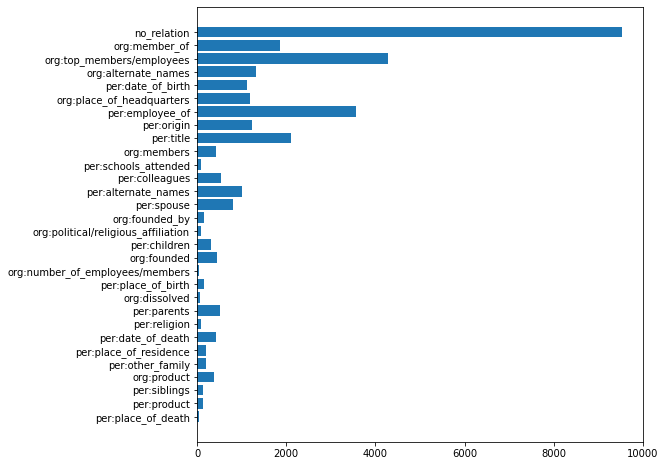

In [89]:
x = list(counter.keys())[::-1]
y = list(counter.values())[::-1]
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
print(x)
ax.barh(x, y)
# ax.yaxis.tick_right()
plt.show()

In [77]:
# 필요한 라이브러리 설치
!pip install konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip install transformers
# !mkdir wordPieceTokenizer

     |████████████████████████████████| 19.4 MB 16.6 MB/s eta 0:00:01     |█████████████████████████████▍  | 17.8 MB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 72.7 MB/s eta 0:00:01
     |████████████████████████████████| 465 kB 98.6 MB/s eta 0:00:01
/bin/bash: curl: command not found


In [94]:
from konlpy.tag import Kkma
from tokenizers import BertWordPieceTokenizer

In [109]:
def myFunction(texts,name) : 
    texts_lens = []   # 단어 말고 문장 길이
    word_list = []      # 단어 전체 리스트
    word_lens_per_sent = []    # 단어 문장 별 길이 : 이번 문장에 단어 몇 개?
    
    # 문장의 길이를 저장 및 띄어쓰기 단위로 토큰화
    if name == 'spacing':
        for text in texts : 
            texts_lens.append(len(text))
        
            # 띄어쓰기 토큰
            words = text.split(' ')
            word_list.extend(words)
            word_lens_per_sent.append(len(words))
    elif name == 'syllable':
        for text in texts : 
            texts_lens.append(len(text))
        
            words = list(text)
            word_list.extend(words)
            word_lens_per_sent.append(len(words))
    elif name == 'morphs':
        tokenizer=Kkma() 
        for text in tqdm(texts) : 
            texts_lens.append(len(text))
        
            words = tokenizer.morphs(text)
            word_list.extend(words)
            word_lens_per_sent.append(len(words))
    elif name == 'Wordpiece':
        from transformers import AutoTokenizer
        wp_tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
        for text in texts : 
            texts_lens.append(len(text))
        
            words = wp_tokenizer.tokenize(text)
            word_list.extend(words)
            word_lens_per_sent.append(len(words))
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    # print(counter)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=10)
    print(word_list)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]
    x = [i for i in range(len(counter))]
    y= sorted([math.log10(word) for word in counter.values()],reverse=True)
    # print('x : ',x)
    # print('y : ',y)
    fig = plt.figure(figsize=(6,3))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    print('각 단어들의 출현 빈도')
    ax.set_title('frequency of each word')
    ax.plot(x, y)

    plt.show()


    x = word_lens_per_sent
    print('각 문장들의 단어 개수에 대한 히스토그램')
    fig = plt.figure(figsize=(5,3))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    ax.set_title('Histogram of the number of words in each sentence')
    ax.hist(x,bins=20)
    plt.show()

    
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list}

spacing , syllable, morphs,Wordpiece

## 01.띄어쓰기 단위 토크나이저

[('등', 2328), ('있다.', 2244), ('밝혔다.', 1691), ('함께', 1628), ('및', 1553), ('전', 1481), ('지난', 1462), ('이', 1395), ('위해', 1380), ('있는', 1344)]
각 단어들의 출현 빈도


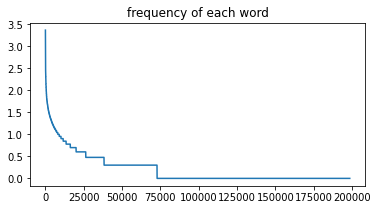

각 문장들의 단어 개수에 대한 히스토그램


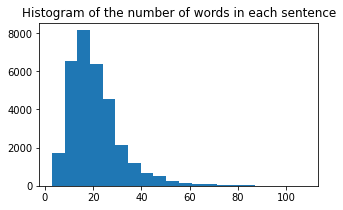

{'texts': 32470,
 'num_unique_words': 198638,
 'maximum': 455,
 'minumum': 14,
 'mean': 97.08395441946412,
 'median': 87.0,
 'word_maximum': 108,
 'word_minumum': 3,
 'word_mean': 20.641422851863258,
 'word_median': 18.0,
 'TOP10_word': ['등', '있다.', '밝혔다.', '함께', '및', '전', '지난', '이', '위해', '있는']}

In [110]:
myFunction(list(train_df.sentence),'spacing')

## 02.음절 단위 토크나이저

[(' ', 637757), ('이', 60143), ('의', 45915), ('다', 45859), ('에', 43806), ('1', 40163), (',', 37642), ('.', 36210), ('로', 34038), ('는', 31347)]
각 단어들의 출현 빈도


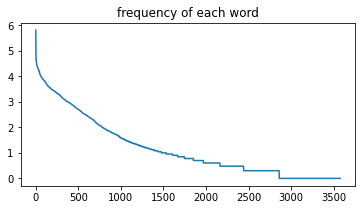

각 문장들의 단어 개수에 대한 히스토그램


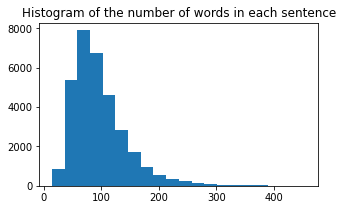

{'texts': 32470,
 'num_unique_words': 3576,
 'maximum': 455,
 'minumum': 14,
 'mean': 97.08395441946412,
 'median': 87.0,
 'word_maximum': 455,
 'word_minumum': 14,
 'word_mean': 97.08395441946412,
 'word_median': 87.0,
 'TOP10_word': [' ', '이', '의', '다', '에', '1', ',', '.', '로', '는']}

In [111]:
myFunction(list(train_df.sentence),'syllable')

## 03.형태소 단위 토크나이저

In [113]:
myFunction(list(train_df.sentence),'morphs')

 12%|█▏        | 3926/32470 [03:00<21:53, 21.74it/s] 


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 0: invalid continuation byte

## 04.Wordpiece 단위 토크나이저

[(',', 37642), ('.', 36210), ('##의', 34920), ('##다', 29480), ('##을', 29307), ('##에', 25994), ('##는', 24825), ('##년', 20918), ('(', 19211), (')', 19190)]
각 단어들의 출현 빈도


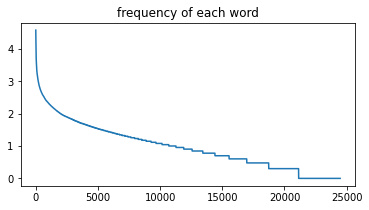

각 문장들의 단어 개수에 대한 히스토그램


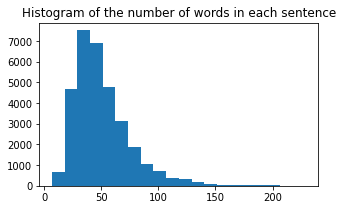

{'texts': 32470,
 'num_unique_words': 24478,
 'maximum': 455,
 'minumum': 14,
 'mean': 97.08395441946412,
 'median': 87.0,
 'word_maximum': 229,
 'word_minumum': 7,
 'word_mean': 50.95860794579612,
 'word_median': 46.0,
 'TOP10_word': [',', '.', '##의', '##다', '##을', '##에', '##는', '##년', '(', ')']}

In [112]:
myFunction(list(train_df.sentence),'Wordpiece')

4개의 토크나이저를 사용했을 때 달라지는 값들을 표로 정리하면 아래와 같습니다. Unique한 단어의 개수는 어절 토크나이저가 가장 많고 음절 토크나이저가 가장 적으며, 문장 내 단어의 평균 개수는 반대로 음절 토크나이저가 가장 많고 어절 토크나이저가 가장 적습니다. 형태소 및 Wordpiece 토크나이저는 한 문장 내의 단어 개수가 약 20~30개로 비슷하게 나왔으나, Unique한 단어의 개수는 형태소 분석기가 더 많은 것을 알 수 있습니다.

|제목|어절|음절|형태소|Wordpiece|
|------|---|---|---|---|
|Unique word|198638|3576|x|24478|
|문장 내 단어 개수의 평균|20|97|x|50|
|문장 내 단어 개수의 중앙값|18|87|x|46|
|문장 내 단어 개수의 최대/최소값|108/3|455/14|x/0|229/7|
|빈번한 상위 5개 단어|['등', '있다.', '밝혔다.', '함께', '및']|[' ', '이', '의', '다', '에']|['하', '.', '이', '의', '는']|[',', '.', '##의', '##다', '##을']|


이와 같이 동일한 코퍼스를 처리하더라도 사용하는 토크나이저의 특성에 따라 문장을 구성하는 단어의 개수, unique한 단어의 개수 등이 크게 달라집니다. 따라서 코퍼스의 특성 및 모델링의 차이에 따라 적절한 토크나이징 및 전처리 기법을 채택하여 사용하는 것이 중요함을 알 수 있습니다.